<h1 align="center">Machine Learning and Statistics</h1>

## Notebook on Machine Learning

In [1]:
import numpy as np

## Basic Neuron Diagram

![Basic Neuron](../ml_practicals/images/neurons.png)

### Single Input Neuron



![Single Neuron](../ml_practicals/images/single_neuron.jpg)

Take a single input x1 and generate an output based on that x1.

Very similar to the standard formula of 
$$ y = mx+c

Phi(x) = x identity activation function

Phi(x1w1 + w0) = x1w1 + w0

### Using NP arrays to simplify the code.
#### Basic Approach for simple neuron function.
- Need an array of x values. These are the inputs, floating points.
- Note that in the x array x[0]must be = 1 per the neuron diagram. 
- Need an array of w values of same size as x. This has all of the weights values. 
- We want the weights to change based on the x inputs and resulting y values (training data) so that the w values can mimic what could be the underlying relationship between x and y. 
- need an identity function.

In [2]:
def identity(x):
    return x

In [3]:
# Trying out basic neuron code
def fire_neuron(x, w, phi):
    return phi(np.sum(x*w))

In [4]:
x = np.array([1.0, 4.0])
w = np.array([2.5, 3.5])
# In this example x0 is 1 and w0 is 2. x1 is 4 and w1 is 3. 
# In the function summing 4*3 + 1*2 = 14
fire_neuron(x,w,identity)


16.5

### Supervised Learning
#### Training Data Sets. 

In the real world we will have inputs and outputs and we are trying to find the relationship between the two to train the neural network, i.e we want to get the network to learn the relationship between the two and find the value of w that best matches that real relationship. 

In [5]:
import matplotlib.pyplot as plt

In [6]:
x_data = np.arange(1,11,1)
x_data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
y_data = 2.5 * x_data + np.random.normal(0,1,len(x_data))
y_data

array([ 1.0890697 ,  7.36799823,  7.98726807, 11.51437395, 12.20203418,
       14.0639459 , 19.53329329, 19.64518596, 20.65455718, 25.7057652 ])

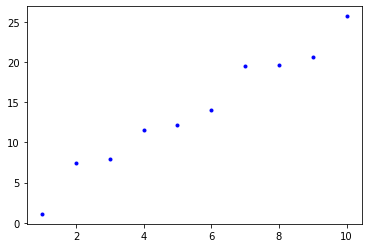

In [8]:
plt.plot(x_data, y_data, 'b.')

In [9]:
i = [3]
x_data[3], y_data[3]

(4, 11.514373946063687)

In [10]:
w = np.array([0.0, 2.0])

fire_neuron(np.array([1.0, x_data[3]]), w, identity)

8.0

## Cost - how do we get to a cost function for our neural network

## Keras and Tensorflow


In [11]:
import numpy as np
# Bring in keras
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [12]:
# Create a model that represent a model of a neural network
model = keras.Sequential()

In [13]:
# This is a single layer with 64 neurons, relu activation function.
model.add(keras.layers.Dense(units=64, activation ='relu'))

In [14]:
# Add another layer with 10 neurons. 
# Dense indicates that every neuron in this layer is connected to every neuron in the 64 layer. 640 connections with 640 weights.
# Extra layers can be added bu using 'add'.
model.add(keras.layers.Dense(units = 10 , activation ='softmax'))

In [15]:
# Compile the neural network, ie build and package it for use. 
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [16]:
# Create test data
x_train = np.random.normal(0.0, 1.0, (100,64))
y_train = np.random.normal(0.5,1.0, (100,10))
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [17]:
# Training data x_train and y_train are Numpy arrays. Epochs is number of times to go through the training dataset. Batch Size is the number of data points 
# presented at one time.
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
4/4 [==============================] - 0s 996us/step - loss: 13.5812 - accuracy: 0.0800
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 13.2651 - accuracy: 0.0900
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 12.9927 - accuracy: 0.0900
Epoch 4/5
4/4 [==============================] - 0s 999us/step - loss: 12.7425 - accuracy: 0.1000
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 12.4677 - accuracy: 0.1200


In [18]:
x_test = np.random.normal(0.0, 1.0, (10,64))
y_test = np.random.normal(0.5,1.0, (10,10))

In [19]:
# Evaluate the network
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

1/1 [==============================] - 0s 1ms/step - loss: 10.9016 - accuracy: 0.0000e+00


In [20]:
# Predictions on the test set. 
classes = model.predict(x_test, batch_size=128)
classes

array([[0.11324408, 0.35782114, 0.06850518, 0.04901462, 0.12266715,
        0.02093421, 0.11324338, 0.04966059, 0.03731098, 0.06759873],
       [0.0349305 , 0.13567887, 0.06447322, 0.02835771, 0.09813308,
        0.08606794, 0.1458829 , 0.03464347, 0.14427523, 0.22755706],
       [0.0239398 , 0.17873569, 0.11312555, 0.07690739, 0.01974158,
        0.0635815 , 0.4220634 , 0.01692546, 0.04019747, 0.04478212],
       [0.09546061, 0.14973782, 0.05422671, 0.10885707, 0.08502652,
        0.06011549, 0.19390835, 0.06233642, 0.12757178, 0.06275917],
       [0.2826211 , 0.05344592, 0.06193099, 0.05221949, 0.05882431,
        0.05628712, 0.18998317, 0.06149989, 0.06885437, 0.11433357],
       [0.0500341 , 0.08779218, 0.03516389, 0.05491938, 0.08649366,
        0.25057888, 0.1255324 , 0.06207069, 0.10921374, 0.13820098],
       [0.03211398, 0.04078713, 0.07683817, 0.3654713 , 0.04901009,
        0.13778585, 0.05405277, 0.1046003 , 0.06895437, 0.07038593],
       [0.07254673, 0.16965751, 0.2016595

### Single Neuron in keras

In [21]:
import numpy as np
# Bring in keras
import tensorflow.keras as keras

In [22]:
model = keras.Sequential()

In [23]:
# Setting a new model with just 1 neuron. No activation function applied.
# In general the activation function actas as a gate between the input of a neuron and the output going to the neuron in the next layer. 
# Most common is Relu, (Rectified Liner Unit), if input is negative returns 0, if positive returns back the input. 
model.add(keras.layers.Dense(units=1))

In [24]:
# Compile the neural network, ie build and package it for use. 
# The loss = mse, is the square of the differenctes between the predicted values of y and the true values, loss = square(y_true = y_pred)
# Optimizer of the method of adjusting the weights to get closer to the desited output.
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

In [25]:
# Generating the input data.
x_data_in = np.arange(1,13,.01)


In [26]:
# Generating the outpt data.
y_data_out = 2.5 * x_data_in + np.random.normal(0,1,len(x_data_in))


In [27]:
# Here the model learns the relationship between the x and y data.
# In this cas we have a predetermined relationship for testing purposes but in real world applications this relationship will not be known
# and it is up to the model to "learn" this.
model.fit(x_data_in, y_data_out, epochs=5, batch_size=32)

Epoch 1/5
38/38 [==============================] - 0s 845us/step - loss: 29.3133 - accuracy: 0.0000e+00
Epoch 2/5
38/38 [==============================] - 0s 751us/step - loss: 1.0929 - accuracy: 0.0000e+00
Epoch 3/5
38/38 [==============================] - 0s 767us/step - loss: 1.0908 - accuracy: 0.0000e+00
Epoch 4/5
38/38 [==============================] - 0s 809us/step - loss: 1.0848 - accuracy: 0.0000e+00
Epoch 5/5
38/38 [==============================] - 0s 714us/step - loss: 1.0735 - accuracy: 0.0000e+00


In [28]:
# Generate test values for x
x_test = np.linspace(-10.0, 20.0, 1000)

In [29]:
# Use the model to predict the outputs from the test data inputs.
predictions = model.predict(x_test)

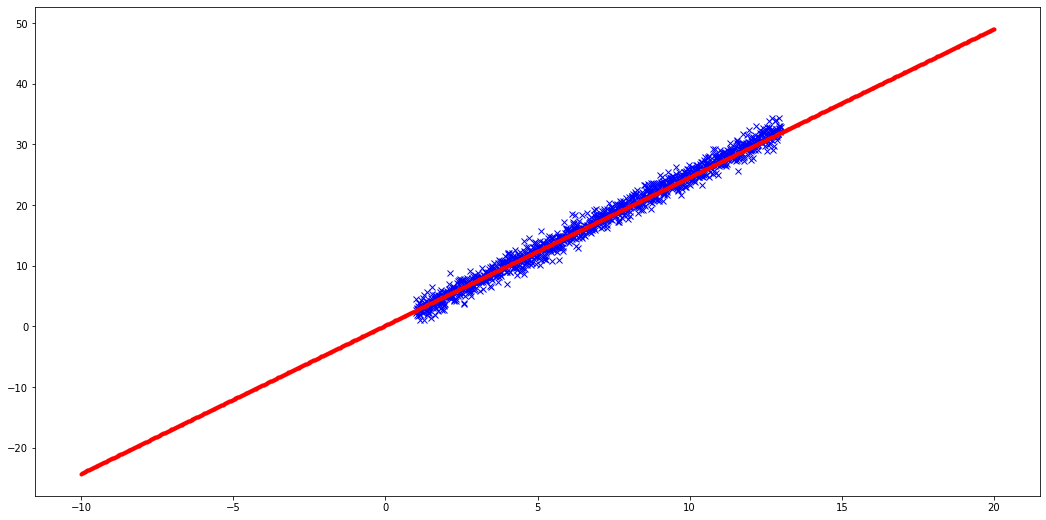

In [30]:
# Plot the predictions vs the original data set. 
fig,ax = plt.subplots(figsize=(18,9))
ax.plot(x_data_in, y_data_out,'bx')
ax.plot(x_test,predictions,'r.')